# Image Preprocessing
The first step of the pipeline is to make images visually homogeneous, so that they are similar to the training samples (low variance).
To reach this goal two algorithms will be used: denoising (gaussian filter) and contrast stretching.

#Downloading data samples from drive and requirements installing

In [1]:
# Install Google Drive Download to get file from Google Drive
!pip install googledrivedownloader

# Install OpenCV and Requirements
!pip uninstall imgaug -y
!pip install imgaug==0.2.5
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python


# Download a file from Google Drive through file ID
from google_drive_downloader import GoogleDriveDownloader as gdd

# Sample 1
# https://drive.google.com/file/d/1_kOgC7YA8_4LPONDgsIzOKlAYwrewK-J/view?usp=share_link
gdd.download_file_from_google_drive(file_id='1_kOgC7YA8_4LPONDgsIzOKlAYwrewK-J',
                                    dest_path='./data/sample1_73_00090.png',
                                    unzip=False)

# Sample 2
# https://drive.google.com/file/d/1SA9cyQNfYg78_xfpAjK3oKHf-QJ6Wi83/view?usp=share_link
gdd.download_file_from_google_drive(file_id='1SA9cyQNfYg78_xfpAjK3oKHf-QJ6Wi83',
                                    dest_path='./data/sample2_630_00390.png',
                                    unzip=False)

# Sample 3
# https://drive.google.com/file/d/1zQVUK9Jgm2EisRwEwFXNJt6ry85aJe9L/view?usp=share_link
gdd.download_file_from_google_drive(file_id='1zQVUK9Jgm2EisRwEwFXNJt6ry85aJe9L',
                                    dest_path='./data/sample3_458_00270.png',
                                    unzip=False)


# Make sure you've run the intro script before running this one
import cv2
print('OpenCV version: ' + cv2.__version__)

from matplotlib import pyplot as plt

import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: imgaug 0.4.0
Uninstalling imgaug-0.4.0:
  Successfully uninstalled imgaug-0.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.7/562.7 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561439 sha256=e22dcdc2b88c46aecb1ff235ca587ca26d8c3d2ce3d2b5d248f70d7df366a10b
  Stored in directory: /root/.cache/pip/wheels/15/ce/73/56b66fd453b11dcfbdb7bff1f4b2c1d448eba44f2212fb3d3b
Successfully built imgaug
OpenCV version: 4.7.0


#Image Samples

Three sample images has been taken from the `Segmentation Full Body TikTok Dancing Dataset` to perform preprocessing.

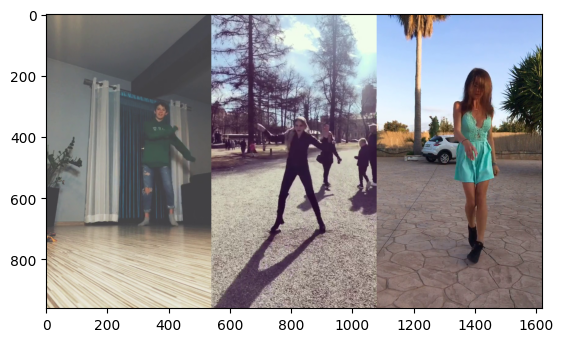

In [2]:
# Read
img1 = cv2.imread('./data/sample1_73_00090.png', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./data/sample2_630_00390.png', cv2.IMREAD_COLOR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3 = cv2.imread('./data/sample3_458_00270.png', cv2.IMREAD_COLOR)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

planes = cv2.hconcat([img1, img2, img3])

plt.imshow(planes)
plt.show()

 # Contrast stretching
 $I_o = (I_i - min_i)*((max_o - min_o)/(max_i - min_i)) + min_o$

Contrast stretching is a simple image enhancement technique that attempts to improve the contrast in an image by `stretching' the range of intensity values it contains to span a desired range of values

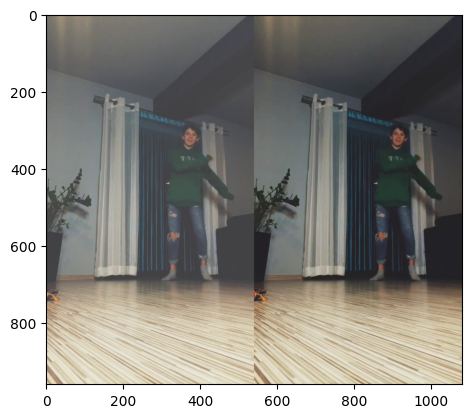

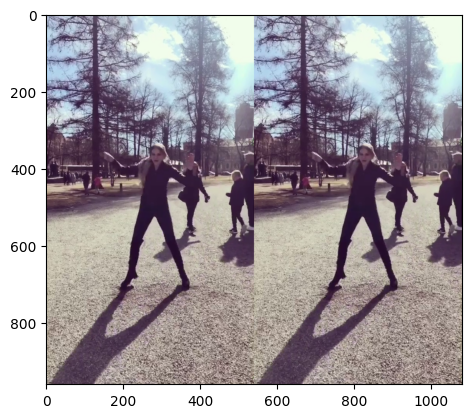

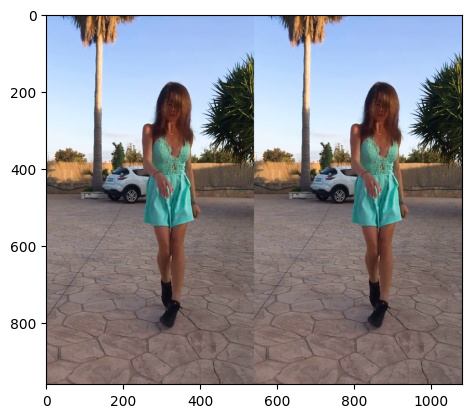

In [3]:
# Contrast Stretching [0, 255] V1
def ContrastStretching1(img, min_o = 0, max_o = 255):
  out = (img - img.min())*((max_o - min_o)/(img.max() - img.min())) + min_o
  return out.astype(img.dtype)

img1_cs = ContrastStretching1(img1)
plt.imshow(cv2.hconcat([img1, img1_cs]))
plt.show()

img2_cs = ContrastStretching1(img2)
#print("--- Image after Contrast Stretching V1 [0, 255]: %s s ---" % (time.time() - start_time))
plt.imshow(cv2.hconcat([img2, img2_cs]))
plt.show()

img3_cs = ContrastStretching1(img3)
#print("--- Image after Contrast Stretching V1 [0, 255]: %s s ---" % (time.time() - start_time))
plt.imshow(cv2.hconcat([img3, img3_cs]))
plt.show()

# Bilateral Filter

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. We believed this filter could enhance image quality and make them more like the training image examples.

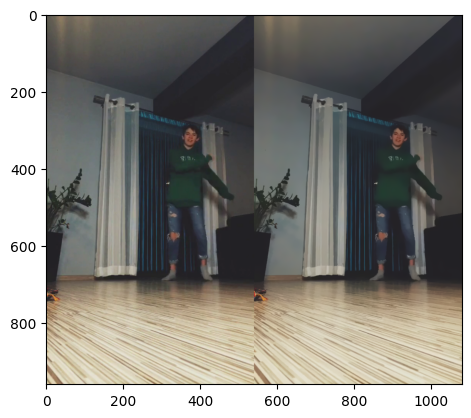

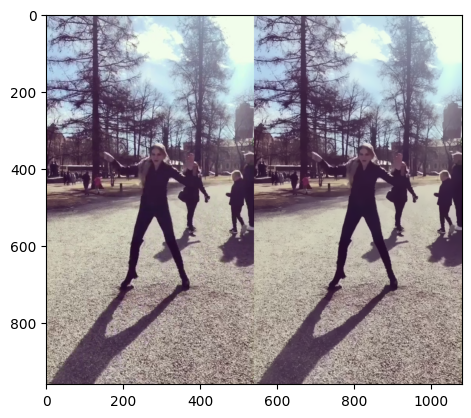

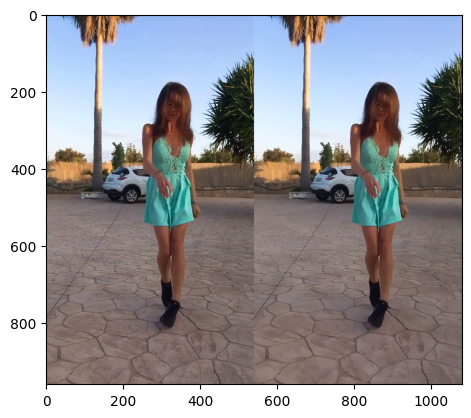

In [4]:
filtered_img1 = cv2.bilateralFilter(img1_cs, 20, 15, 15)
plt.imshow(cv2.hconcat([img1_cs, filtered_img1]))
plt.show()

filtered_img2 = cv2.bilateralFilter(img2_cs, 20, 15, 15)
plt.imshow(cv2.hconcat([img2_cs, filtered_img2]))
plt.show()

filtered_img3 = cv2.bilateralFilter(img3_cs, 20, 15, 15)
plt.imshow(cv2.hconcat([img3_cs, filtered_img3]))
plt.show()